In [10]:
# Install libraries
!pip install py3dep matplotlib ipyleaflet rasterio

In [11]:
# Import libraries, tools
import py3dep
import rasterio
import matplotlib.pyplot as plt
from ipyleaflet import Map, DrawControl


In [12]:
# Define a function to handle rectangle selection
def handle_draw(self, action, geo_json):
  global bbox
  bbox = geo_json['geometry']['coordinates'] [0]
  print("Bounding box coordinates set.")

# Add a drawing control to the map
draw_control = DrawControl()
draw_control.rectangle = {"shapeOptions": {"fillColor": "#fca45d"}}
m.add_control(draw_control)

# Attach the handler to the drawing control
draw_control.on_draw(handle_draw)

#Display the map
display(m)

#

Map(bottom=189827.0, center=[44.49895417752395, -93.88775340510564], controls=(ZoomControl(options=['position'…

Bounding box coordinates set.
Bounding box coordinates set.
Bounding box coordinates set.
Bounding box coordinates set.


In [15]:
#Extract the coordinates from the drawn rectangle
x_cords = [point[0] for point in bbox]
y_cords = [point[1] for point in bbox]

# Find the min/max coordinates
min_x = min(x_cords)
max_x = max(x_cords)
min_y = min(y_cords)
max_y = max(y_cords)

# Define bbox in the correct format
bbox = [min_x, min_y, max_x, max_y]
print("Generated Bounding Box:", bbox)

Generated Bounding Box: [-94.095858, 44.461721, -93.939376, 44.546931]


In [16]:
# Obtain the dem_res dictionary
dem_res = py3dep.check_3dep_availability(bbox)

# Print the table header
print("Resolution | Availability |")
print("|----------|--------------|")

# Print each key-value pair in the dictionary as a row in the table
for resolution, availability in dem_res.items():
  print(f"| {resolution:<10} | {availability:<12} |")

Resolution | Availability |
|----------|--------------|
| 1m         | 0            |
| 3m         | 1            |
| 5m         | 0            |
| 10m        | 1            |
| 30m        | 1            |
| 60m        | 0            |
| topobathy  | 0            |


In [19]:
# Fetch data
res = 3
dem = py3dep.get_map("DEM", bbox, res)

fig, ax = plt.subplots(figsize=(10,5), dpi=100)
_ = dem.plot(ax=ax, robust=True)

ServiceUnavailableError: Service is currently not available, try again later:
https://elevation.nationalmap.gov/arcgis/services/3DEPElevation/ImageServer/WMSServer

In [20]:
# Check if DEM data is fetched sucessfully
if dem is not None:
  # Export DEM data as GeoTIFF
  dem_resolution = res
  dem.rio.to_raster(f"DEM_{dem_resolution}m.tif")
  print(f"DEM data at {dem_resolution} meter resolution exported as GeoTIFF successfully.")

DEM data at 3 meter resolution exported as GeoTIFF successfully.


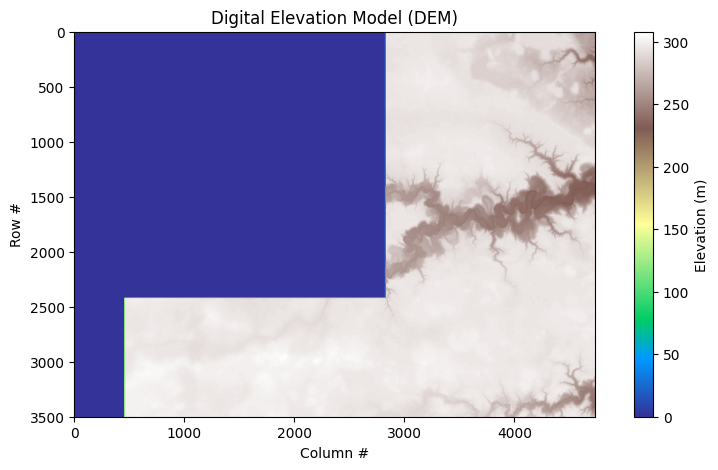

In [22]:
# Open the downloaded GeoTIFF file
with rasterio.open('DEM_3m.tif') as src:
  # Read the raster data
  dem = src.read(1)
  # Get the georeferencing information
  transform = src.transform

  # Visualize the DEM
  plt.figure(figsize=(10, 5))
  plt.imshow(dem, cmap='terrain', vmin=dem.min(), vmax=dem.max())
  plt.colorbar(label='Elevation (m)')
  plt.title('Digital Elevation Model (DEM)')
  plt.xlabel('Column #')
  plt.ylabel('Row #')
  plt.show()